# Corsework part one

## Financial Time Series

### Data Import via yfinance

Install the yfinance package, which is the downloader connected with the Yahoo Fiannce API.

In [73]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [74]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib as mpl

Download the data and save it as a pandas DataFrame.

In [75]:
initial_data = yf.download("TWTR ^VIX", start="2020-03-01", end="2021-03-02")

[*********************100%***********************]  2 of 2 completed


In [76]:
initial_data.head()

Adj Close                 Close                  High             \
                 TWTR       ^VIX       TWTR       ^VIX       TWTR       ^VIX   
Date                                                                           
2020-03-02  35.820000  33.419998  35.820000  33.419998  36.860001  40.410000   
2020-03-03  34.930000  36.820000  34.930000  36.820000  36.480000  41.060001   
2020-03-04  36.000000  31.990000  36.000000  31.990000  36.000000  35.580002   
2020-03-05  34.970001  39.619999  34.970001  39.619999  35.730000  42.840000   
2020-03-06  33.459999  41.939999  33.459999  41.939999  33.990002  54.389999   

                  Low                  Open               Volume       
                 TWTR       ^VIX       TWTR       ^VIX      TWTR ^VIX  
Date                                                                   
2020-03-02  35.139999  31.500000  36.000000  38.540001  39914700    0  
2020-03-03  34.410000  24.930000  36.020000  33.650002  22973100    0  
2020-03-04  34.770000  30.299999  35.759998  34.439999  14980300    0  
2020-03-05  34.520000  33.540001  35.029999  33.610001  14132200    0  
2020-03-06  32.509998  40.840000  33.810001  48.930000  20361100    0

In [77]:
initial_data.tail()

Adj Close                 Close                  High             \
                 TWTR       ^VIX       TWTR       ^VIX       TWTR       ^VIX   
Date                                                                           
2021-02-23  73.169998  23.110001  73.169998  23.110001  74.330002  27.010000   
2021-02-24  71.919998  21.340000  71.919998  21.340000  73.949997  25.040001   
2021-02-25  74.589996  28.889999  74.589996  28.889999  80.750000  31.160000   
2021-02-26  77.059998  27.950001  77.059998  27.950001  79.080002  30.820000   
2021-03-01  77.629997  23.350000  77.629997  23.350000  78.730003  25.389999   

                  Low                  Open               Volume       
                 TWTR       ^VIX       TWTR       ^VIX      TWTR ^VIX  
Date                                                                   
2021-02-23  66.190002  22.500000  68.449997  22.820000  32669500    0  
2021-02-24  71.709999  21.309999  73.099998  23.760000  18309900    0  
2021-02-25  73.889999  21.520000  78.150002  21.730000  63625700    0  
2021-02-26  75.000000  25.230000  76.870003  28.730000  35307600    0  
2021-03-01  76.050003  23.170000  78.360001  25.200001  24277600    0

In [148]:
initial_data['Adj Close'].head()

,TWTR,^VIX
Date,,
2020-03-02,35.820000,33.419998
2020-03-03,34.930000,36.820000
2020-03-04,36.000000,31.990000
2020-03-05,34.970001,39.619999
2020-03-06,33.459999,41.939999


Set the Adj Closed data as a new DataFrame we will use.

In [153]:
data =  initial_data['Adj Close']
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2020-03-02 to 2021-03-01
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TWTR    252 non-null    float64
 1   ^VIX    252 non-null    float64
dtypes: float64(2)
memory usage: 15.9 KB


In [150]:
data.head()

,TWTR,^VIX
Date,,
2020-03-02,35.820000,33.419998
2020-03-03,34.930000,36.820000
2020-03-04,36.000000,31.990000
2020-03-05,34.970001,39.619999
2020-03-06,33.459999,41.939999


In [151]:
data.tail()

,TWTR,^VIX
Date,,
2021-02-23,73.169998,23.110001
2021-02-24,71.919998,21.340000
2021-02-25,74.589996,28.889999
2021-02-26,77.059998,27.950001
2021-03-01,77.629997,23.350000


array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

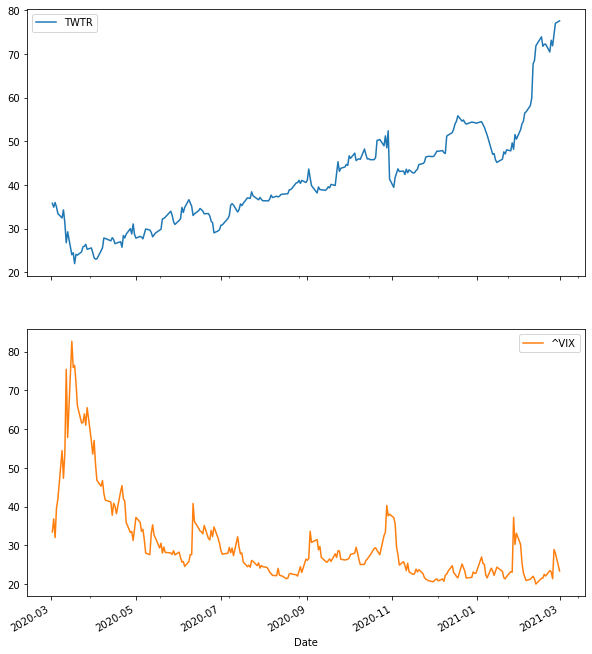

In [152]:
data.plot(figsize=(10, 12), subplots=True)

### Summary Statistics

In [83]:
data.describe().round(2)

,TWTR,^VIX
count,252.00,252.00
mean,40.90,30.44
std,11.50,11.21
min,22.00,19.97
25%,32.43,23.23
50%,39.17,26.92
75%,47.22,33.05
max,77.63,82.69


In [147]:
TWTR.data = data['TWTR']

NameError: name 'TWTR' is not defined

Date
2020-03-02    35.820000
2020-03-03    34.930000
2020-03-04    36.000000
2020-03-05    34.970001
2020-03-06    33.459999
                ...    
2021-02-23    73.169998
2021-02-24    71.919998
2021-02-25    74.589996
2021-02-26    77.059998
2021-03-01    77.629997
Name: TWTR, Length: 252, dtype: float64

### Changes over Time

There are multiple options to calculate the changes in a time series over time, including absolute differences, percentage changes, and logarithmic (log) returns.

First, the absolute differences, for which pandas provides a special method:

In [84]:
data.diff().head().round(2)

,TWTR,^VIX
Date,,
2020-03-02,NaN,NaN
2020-03-03,-0.89,3.40
2020-03-04,1.07,-4.83
2020-03-05,-1.03,7.63
2020-03-06,-1.51,2.32


In [85]:
data.diff().tail().round(2)

,TWTR,^VIX
Date,,
2021-02-23,2.68,-0.34
2021-02-24,-1.25,-1.77
2021-02-25,2.67,7.55
2021-02-26,2.47,-0.94
2021-03-01,0.57,-4.60


In [86]:
data.diff().describe().round(2)

,TWTR,^VIX
count,251.00,251.00
mean,0.17,-0.04
std,1.58,3.66
min,-11.07,-17.64
25%,-0.58,-1.38
50%,0.16,-0.30
75%,0.80,0.89
max,7.90,24.86


From a statistics point of view, absolute changes are not optimal because they are dependent on the scale of the time series data itself. Therefore, percentage changes are usually preferred. The following code derives the percentage changes or percentage returns (also: simple returns) in a financial context and visualizes their mean values per column:

In [87]:
data.pct_change().round(4).head()

,TWTR,^VIX
Date,,
2020-03-02,NaN,NaN
2020-03-03,-0.0248,0.1017
2020-03-04,0.0306,-0.1312
2020-03-05,-0.0286,0.2385
2020-03-06,-0.0432,0.0586


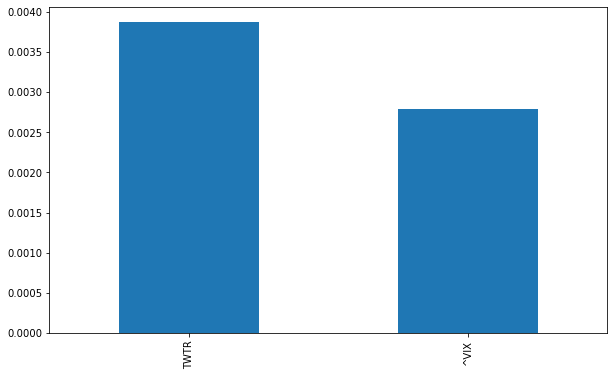

In [88]:
data.pct_change().mean().plot(kind='bar', figsize=(10, 6));

As an alternative to percentage returns, log returns can be used. In some scenarios, they are easier to handle and therefore often preferred in a financial context.

In [89]:
rets = np.log(data / data.shift(1))
rets.head().round(4)

,TWTR,^VIX
Date,,
2020-03-02,NaN,NaN
2020-03-03,-0.0252,0.0969
2020-03-04,0.0302,-0.1406
2020-03-05,-0.0290,0.2139
2020-03-06,-0.0441,0.0569


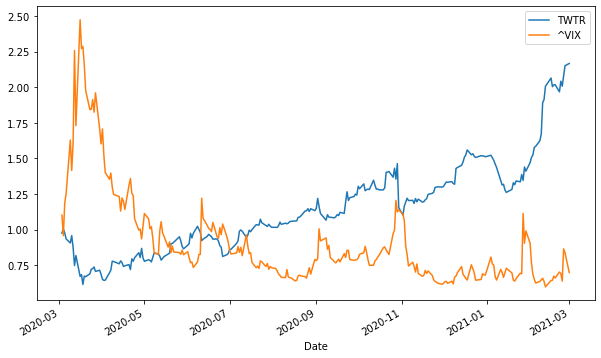

In [90]:
rets.cumsum().apply(np.exp).plot(figsize=(10, 6));

### Resampling

Resampling is an important operation on financial time series data. Usually this takes the form of downsampling, meaning that, for example, a tick data series is resampled to one-minute intervals or a time series with daily observations is resampled to one with weekly or monthly observations

In [91]:
data.resample('1w', label='right').last().head()

,TWTR,^VIX
Date,,
2020-03-08,33.459999,41.939999
2020-03-15,29.290001,57.830002
2020-03-22,23.950001,66.040001
2020-03-29,25.290001,65.540001
2020-04-05,23.090000,46.799999


In [92]:
data.resample('1m', label='right').last().head()

,TWTR,^VIX
Date,,
2020-03-31,24.559999,53.540001
2020-04-30,28.680000,34.150002
2020-05-31,30.969999,27.510000
2020-06-30,29.790001,30.430000
2020-07-31,36.400002,24.459999


<AxesSubplot:xlabel='Date'>

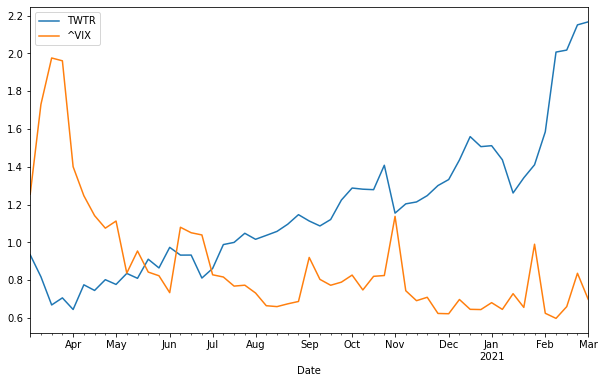

In [93]:
rets.cumsum().apply(np.exp). resample('1w', label='right').last().plot(figsize=(10, 6))

<AxesSubplot:xlabel='Date'>

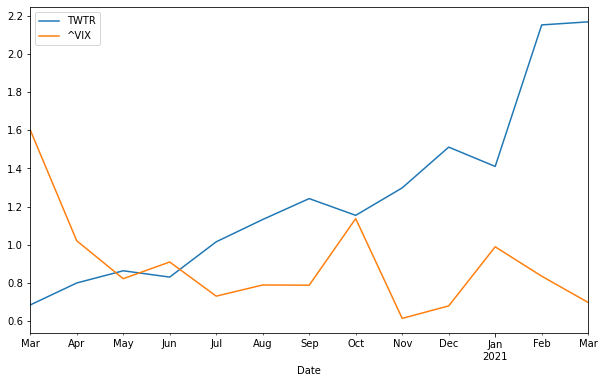

In [94]:
rets.cumsum().apply(np.exp). resample('1m', label='right').last().plot(figsize=(10, 6))

### Rolling Statistics

It is financial tradition to work with rolling statistics, often also called financial indicators or financial studies. Such rolling statistics are basic tools for financial chartists and technical traders, for example. This section works with a single
financial time series only:

In [155]:
TWTR_data = pd.DataFrame(data["TWTR"]).dropna()
TWTR_data.tail()

,TWTR
Date,
2021-02-23,73.169998
2021-02-24,71.919998
2021-02-25,74.589996
2021-02-26,77.059998
2021-03-01,77.629997


In [160]:
TWTR_data = pd.DataFrame(data["TWTR"]).dropna()
TWTR_data.head()

,TWTR
Date,
2020-03-02,35.820000
2020-03-03,34.930000
2020-03-04,36.000000
2020-03-05,34.970001
2020-03-06,33.459999


In [157]:
window = 10
sym = 'TWTR'
TWTR_data['min'] = data[sym].rolling(window=window).min()
TWTR_data['mean'] = data[sym].rolling(window=window).mean()
TWTR_data['std'] = data[sym].rolling(window=window).std()
TWTR_data['median'] = data[sym].rolling(window=window).median()
TWTR_data['max'] = data[sym].rolling(window=window).max()
TWTR_data['ewma'] = data[sym].ewm(halflife=0.5, min_periods=window).mean()
TWTR_data.dropna().head()

,TWTR,min,mean,std,median,max,ewma
Date,,,,,,,
2020-03-13,29.290001,26.780001,32.932,3.019819,33.885000,36.000000,28.986194
2020-03-16,24.040001,24.040001,31.754,3.928868,32.959999,36.000000,25.276548
2020-03-17,24.480000,24.040001,30.709,4.356705,31.879999,36.000000,24.679137
2020-03-18,22.000000,22.000000,29.309,4.703189,30.295000,34.970001,22.669784
2020-03-19,24.129999,22.000000,28.225,4.498203,28.035001,34.310001,23.764945


In [161]:
TWTR_data

,TWTR
Date,
2020-03-02,35.820000
2020-03-03,34.930000
2020-03-04,36.000000
2020-03-05,34.970001
2020-03-06,33.459999
...,...
2021-02-23,73.169998
2021-02-24,71.919998
2021-02-25,74.589996


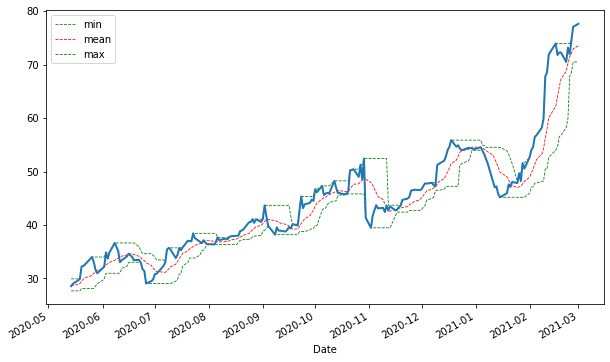

In [98]:
ax = TWTR_data[['min', 'mean', 'max']].iloc[-200:].plot(figsize=(10, 6), style=['g--', 'r--', 'g--'], lw=0.8)
data[sym].iloc[-200:].plot(ax=ax, lw=2.0);

Rolling statistics are a major tool in the so-called technical analysis of stocks, as compared to the fundamental analysis which focuses, for instance, on financial reports and the strategic positions of the company whose stock is being analysed.

A decades-old trading strategy based on technical analysis is using two simple moving averages (SMAs). The idea is that the trader should go long on a stock (or financial instrument in general) when the shorter-term SMA is above the longer-term SMA and should go short when the opposite holds true. The concepts can be made precise with pandas and the capabilities of the DataFrame
object.

Rolling statistics are generally only calculated when there is enough data given the window parameter specification.

In [117]:
TWTR_data['SMA1'] = data[sym].rolling(window=20).mean()
TWTR_data['SMA2'] = data[sym].rolling(window=60).mean()
TWTR_data[[sym, 'SMA1', 'SMA2']].tail()

,TWTR,SMA1,SMA2
Date,,,
2021-02-23,73.169998,61.736999,54.146666
2021-02-24,71.919998,62.849499,54.571500
2021-02-25,74.589996,64.169499,55.038166
2021-02-26,77.059998,65.443999,55.547333
2021-03-01,77.629997,66.798999,56.063333


In [118]:
TWTR_data['SMA3'] = data[sym].rolling(window=5).mean()
TWTR_data['SMA4'] = data[sym].rolling(window=10).mean()
TWTR_data[[sym, 'SMA3', 'SMA4']].tail()

,TWTR,SMA3,SMA4
Date,,,
2021-02-23,73.169998,71.998000,70.204999
2021-02-24,71.919998,72.023999,71.409999
2021-02-25,74.589996,72.489998,72.091999
2021-02-26,77.059998,73.445998,72.941999
2021-03-01,77.629997,74.873997,73.514999


<AxesSubplot:xlabel='Date'>

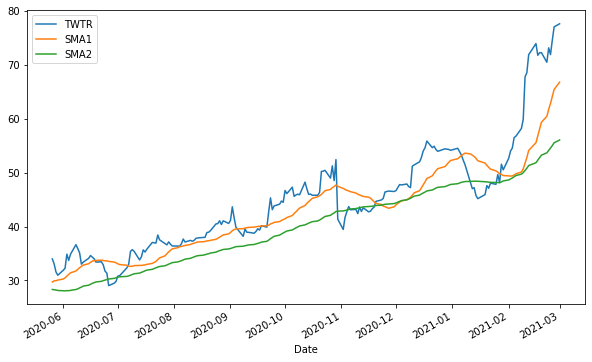

In [119]:
TWTR_data[[sym, 'SMA1', 'SMA2']].plot(figsize=(10, 6))
#if the 20 days moving average is more than 60 days moving average will be increasing trend

<AxesSubplot:xlabel='Date'>

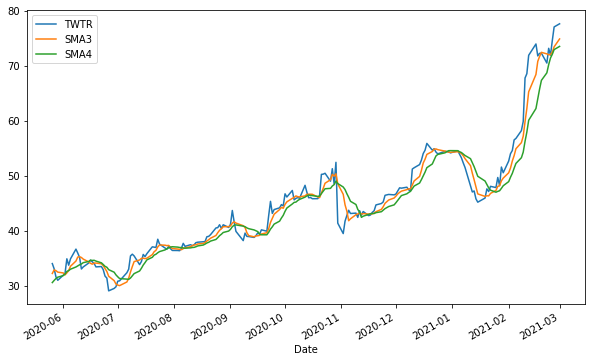

In [120]:
TWTR_data[[sym, 'SMA3', 'SMA4']].plot(figsize=(10, 6))

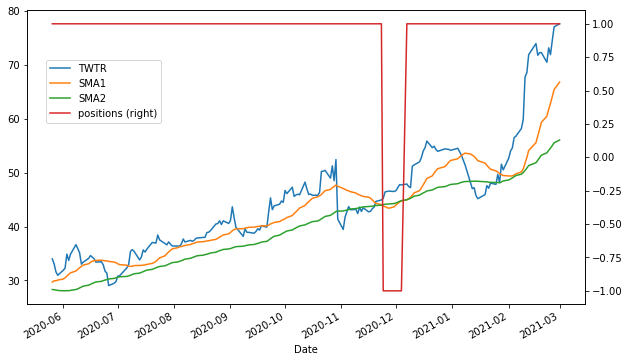

In [121]:
TWTR_data.dropna(inplace=True)
TWTR_data['positions'] = np.where(TWTR_data['SMA1'] > TWTR_data['SMA2'],1,-1)
ax = TWTR_data[[sym, 'SMA1', 'SMA2', 'positions']].plot(figsize=(10, 6),secondary_y='positions')
ax.get_legend().set_bbox_to_anchor((0.25, 0.85))
#Trend analysis

### Correlation Analysis

As a further illustration of how to work with pandas and financial time series data, consider the case of the S&P 500 stock index and the VIX volatility index.

It is a stylized fact that when the S&P 500 rises, the VIX falls in general, and vice versa. This is about correlation and not causation. This section shows how to come up with some supporting statistical evidence for the stylized fact that the S&P 500 and the VIX are (highly) negatively correlated.

In [122]:
Corr_data = data[['TWTR', '^VIX']].dropna()
Corr_data.tail()

,TWTR,^VIX
Date,,
2021-02-23,73.169998,23.110001
2021-02-24,71.919998,21.340000
2021-02-25,74.589996,28.889999
2021-02-26,77.059998,27.950001
2021-03-01,77.629997,23.350000


array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

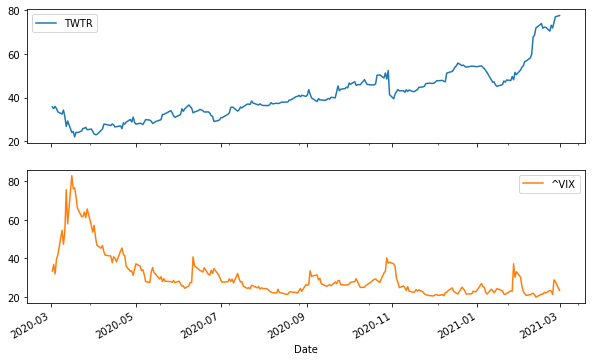

In [123]:
Corr_data.plot(subplots=True, figsize=(10, 6))

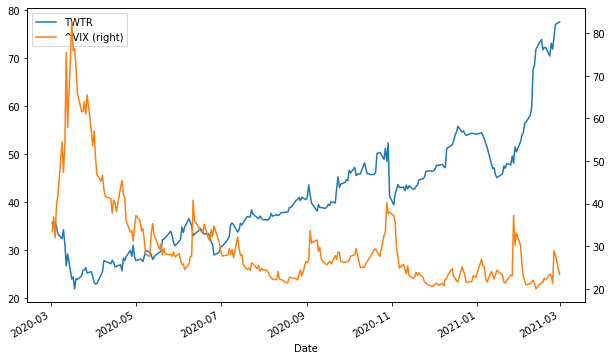

In [124]:
Corr_data.loc['2020-01-01':].plot(secondary_y='^VIX', figsize=(10, 6));

#### Logarithmic Returns

As pointed out earlier, statistical analysis in general relies on returns instead of absolute changes or even absolute values. Therefore, we’ll calculate log returns first before any further analysis takes place.

In [125]:
sprets = np.log(Corr_data / Corr_data.shift(1))
sprets.head()

,TWTR,^VIX
Date,,
2020-03-02,NaN,NaN
2020-03-03,-0.025160,0.096887
2020-03-04,0.030173,-0.140618
2020-03-05,-0.029028,0.213911
2020-03-06,-0.044140,0.056906


array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

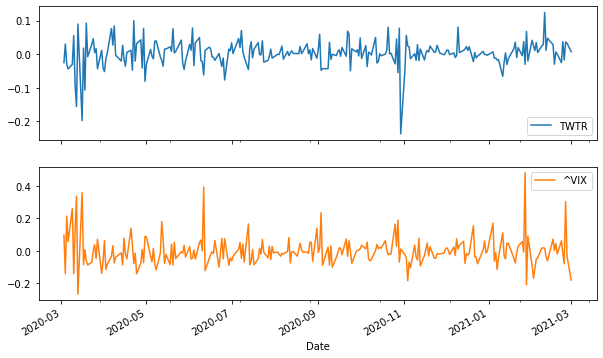

In [126]:
sprets.dropna(inplace=True)
sprets.plot(subplots=True, figsize=(10, 6))

In such a context, the pandas scatter_matrix() plotting function comes in handy for visualizations. It plots the log returns of the two series against each other, and one can add either a histogram or a kernel density estimator (KDE) on the diagonal:

array([[<AxesSubplot:xlabel='TWTR', ylabel='TWTR'>,
        <AxesSubplot:xlabel='^VIX', ylabel='TWTR'>],
       [<AxesSubplot:xlabel='TWTR', ylabel='^VIX'>,
        <AxesSubplot:xlabel='^VIX', ylabel='^VIX'>]], dtype=object)

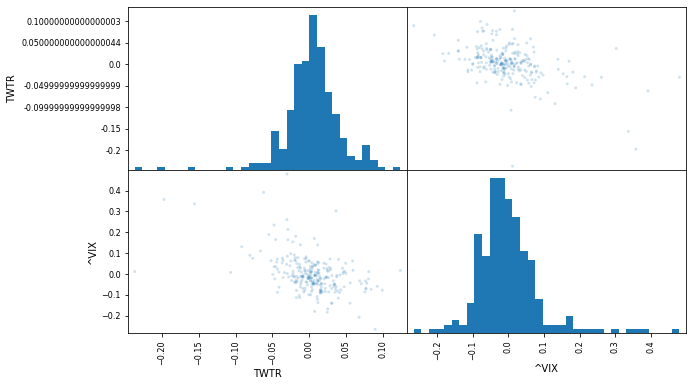

In [127]:
pd.plotting.scatter_matrix(sprets, alpha=0.2, diagonal='hist', hist_kwds={'bins': 35}, figsize=(10, 6))

#### OLS Regression

With all these preparations, an ordinary least-squares (OLS) regression analysis is convenient to implement.

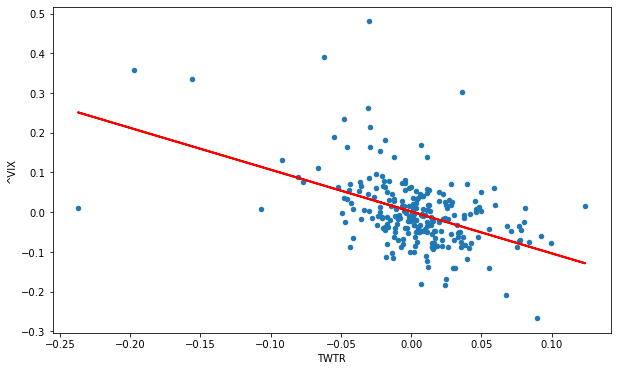

In [129]:
reg = np.polyfit(sprets['TWTR'], sprets['^VIX'], deg=1)
ax = sprets.plot(kind='scatter', x='TWTR', y='^VIX', figsize=(10, 6))
ax.plot(sprets['TWTR'], np.polyval(reg, sprets['TWTR']), 'r', lw=2);

#### Correlation

Finally, we consider correlation measures directly. Two such measures are considered: a static one taking into account the complete data set and a rolling one showing the correlation for a fixed window over time.

In [130]:
sprets.corr()

,TWTR,^VIX
TWTR,1.000000,-0.467988
^VIX,-0.467988,1.000000


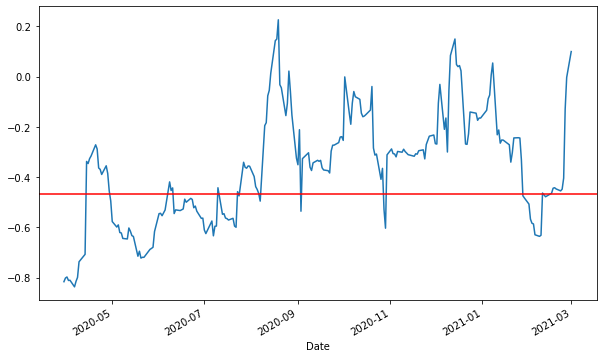

In [134]:
ax = sprets['TWTR'].rolling(window=20).corr(sprets['^VIX']).plot(figsize=(10, 6)) 
ax.axhline(sprets.corr().iloc[0, 1], c='r');
#the correlation is negative most the time 